# Importing Libraries

In [2]:
import pandas as pd
import math
import numpy as np
from scipy.stats import norm
from scipy import stats

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#from google.colab import drive
#drive.mount('/IMDB_data_NoDup.csv')

# Loading and reading csv data for prepossing
 

In [4]:
IMDB_data_NoDup = "C:\\Users\\vishd\\Desktop\\reetu\\Springboard course\\Project 1\\IMDB_data_NoDup_copy_for_prepossing.csv"
#IMDB_data_NoDup.head()
#IMDB_data_NoDup = "/content/IMDB_data_NoDup.csv"
#IMDB_data_NoDup = pd.read_csv(IMDB_data_NoDup, sep='\t')
#IMDB_data_NoDup.shape
IMDB_data_NoDup = pd.read_csv(IMDB_data_NoDup, nrows = 5000)#, delimiter=',', header=None, skiprows=1)#, names=['LABEL','F1','F2','F3','F4','F5','X','Y','Z','C1','C2'])                                                # loading first files
IMDB_data_NoDup.head()


,Unnamed: 0,titleId,title,region,titleType,startYear,genres,directors,writers,AveRating,Num_of_Votes,primaryName_Director,birthYear_Director,deathYear,primaryProfession_director,Dir_knownForTitles,Age_of_movie,Director_age,Decade
0,0,tt0000019,The Clown Barber,GB,short,1898,"Comedy,Short",nm0932055,\N,5.3,19.0,James Williamson,1855.0,1933.0,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",123.0,78.0,D6
1,1,tt0271697,Our New Errand Boy,GB,short,1905,"Comedy,Short",nm0932055,\N,5.4,98.0,James Williamson,1855.0,1933.0,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",116.0,78.0,D6
2,2,tt0274177,Two Naughty Boys Teasing the Cobbler,GB,short,1898,"Comedy,Short",nm0932055,nm0932055,4.4,7.0,James Williamson,1855.0,1933.0,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",123.0,78.0,D6
3,3,tt0308848,Saved by a Dream,GB,short,1909,"Drama,Short",nm0932055,\N,6.3,6.0,James Williamson,1855.0,1933.0,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",112.0,78.0,D6
4,4,tt0454320,£100 Reward,GB,short,1908,"Drama,Short",nm0932055,\N,5.3,12.0,James Williamson,1855.0,1933.0,"director,cinematographer,writer","tt0132534,tt0000355,tt0000273,tt0465763",113.0,78.0,D6


In [5]:
IMDB_data_NoDup.shape

(4995, 19)

# Selecting predictive variable y 

In [6]:
## selection of y 
y = IMDB_data_NoDup[['AveRating']]#.set_index(['AveRating'])
print(y)
y.shape

      AveRating
0           5.3
1           5.4
2           4.4
3           6.3
4           5.3
...         ...
4990        8.0
4991        7.6
4992        7.5
4993        7.5
4994        7.1

[4995 rows x 1 columns]


(4995, 1)

# Selecting descriptive variable y

In [7]:
# selection of X and y 

X = IMDB_data_NoDup.drop(['AveRating'], axis = 1)#.set_index(['AveRating'])
#print(X)
X.shape


(4995, 18)

In [8]:
#df = df[['geoName', 'geoCode', 'value']].set_index(
            #['geoName']).sort_index()

# Splitting Data in train and test set

In [9]:
# split into train test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(y_train)
type(X_train)

      AveRating
907         4.3
4361        6.4
2102        7.7
1607        7.4
2896        5.2
...         ...
3389        6.2
1068        6.5
3931        5.8
4678        6.0
3856        4.7

[3996 rows x 1 columns]


pandas.core.frame.DataFrame

# Encoding Cat Variable by OneHotEncoder

In [10]:
from sklearn.preprocessing import OneHotEncoder

#all_encoder = []    
class MultiColumnLabelEncoder():
    all_encoder = []
       
    def __init__(self, dataSource, sourceColumnNames):
        self.dataSource = dataSource
        self.sourceColumnNames = sourceColumnNames

    def fit(self):
        for col in self.sourceColumnNames:
            encoder = OneHotEncoder(handle_unknown = "ignore")
            encoder = encoder.fit(self.dataSource[col])
            self.all_encoder.append(encoder) 
            
    def transform(self, test_data):
        final_data = []
        
        for i,col in enumerate(self.sourceColumnNames):
            data = self.all_encoder[i].transform(test_data[col])
            final_data =np.append(final_data,[data])
        #print(self.dataSource[col])
        #print(type(pd.DataFrame(self.all_encoder)))
  
        return final_data
            
       

In [11]:
columns = [['titleId', "title",'region', 'titleType','directors', 'writers', 'primaryName_Director', 
                                             'primaryProfession_director', 'Dir_knownForTitles', 'Decade']]

data_coder = MultiColumnLabelEncoder(X_train, columns)
data_coder.fit()
Xtest_data = data_coder.transform(X_test)
print(Xtest_data[0].shape)
Xtrain_data = data_coder.transform(X_train)
print(Xtrain_data[0].shape)

print(Xtrain_data)

(999, 12142)
(3996, 12142)
[<3996x12142 sparse matrix of type '<class 'numpy.float64'>'
 	with 39960 stored elements in Compressed Sparse Row format>]


#  Encoding Commaseparated values by multilabelBinarizer

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer
 
    
#MLB_encoder = []    
class MultiLabelBinarizer1():
    MLB_encoder = []
    
    def __init__(self, dataSource, sourceColumnNames):
        self.dataSource = dataSource
        self.sourceColumnNames = sourceColumnNames

    def fit(self):
        #self.MLB_encoder = []
       
        for col in self.sourceColumnNames:
            ML_coder = MultiLabelBinarizer()
            ML_coder = ML_coder.fit(self.dataSource[col])
            self.MLB_encoder.append(ML_coder)
      
    def transform(self, test_data2):
        ML_data = []
        for i,col in enumerate(self.sourceColumnNames):
            B_data = self.MLB_encoder[i].transform(test_data2[col])
            #print(data)
            ML_data =np.append(ML_data,[B_data])
            
        return ML_data
              

In [13]:
colum = [['genres', "Dir_knownForTitles"]]


M_Coder_XTrain = MultiLabelBinarizer1(X_train, colum)
M_Coder_XTrain.fit()


#MultiLabelBinarizer1(X_test, colum)
X_tain2 = M_Coder_XTrain.transform(X_train)
print(X_tain2.shape)
X_test2 = M_Coder_XTrain.transform(X_test)
print(X_test2.shape)


(30,)
(30,)


# Concatenating both encoded array

In [14]:
Xtrain_data = np.concatenate([Xtrain_data,X_tain2])
Xtest_data = np.concatenate([Xtest_data, X_test2])

In [15]:
#print(X_train["titleId"])
print(Xtrain_data[0])
print(Xtest_data[0])

  (0, 201)	1.0
  (0, 6930)	1.0
  (0, 7979)	1.0
  (0, 7983)	1.0
  (0, 7991)	1.0
  (0, 10218)	1.0
  (0, 10648)	1.0
  (0, 11342)	1.0
  (0, 11470)	1.0
  (0, 12140)	1.0
  (1, 2567)	1.0
  (1, 4416)	1.0
  (1, 7979)	1.0
  (1, 7983)	1.0
  (1, 8732)	1.0
  (1, 10078)	1.0
  (1, 10812)	1.0
  (1, 11340)	1.0
  (1, 11857)	1.0
  (1, 12138)	1.0
  (2, 3699)	1.0
  (2, 4786)	1.0
  (2, 7979)	1.0
  (2, 7984)	1.0
  (2, 8048)	1.0
  :	:
  (3993, 9474)	1.0
  (3993, 11202)	1.0
  (3993, 11291)	1.0
  (3993, 11719)	1.0
  (3993, 12139)	1.0
  (3994, 1221)	1.0
  (3994, 7907)	1.0
  (3994, 7965)	1.0
  (3994, 7983)	1.0
  (3994, 8255)	1.0
  (3994, 9439)	1.0
  (3994, 10678)	1.0
  (3994, 11346)	1.0
  (3994, 11870)	1.0
  (3994, 12139)	1.0
  (3995, 3026)	1.0
  (3995, 7730)	1.0
  (3995, 7979)	1.0
  (3995, 7983)	1.0
  (3995, 8358)	1.0
  (3995, 9700)	1.0
  (3995, 11091)	1.0
  (3995, 11326)	1.0
  (3995, 12017)	1.0
  (3995, 12139)	1.0
  (0, 7967)	1.0
  (0, 7983)	1.0
  (0, 8525)	1.0
  (0, 8741)	1.0
  (0, 11117)	1.0
  (0, 11353)	1.0


In [16]:
print(Xtrain_data.shape)
print(Xtest_data.shape)

(31,)
(31,)


# Modelling 

# 1 Regression Model

In [17]:
 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

#Training the model.
reg.fit(Xtrain_data[0], y_train)

#Predict test data set.
y_pred = reg.predict(Xtest_data[0])
#print(y_pred)




print(y_pred.shape)
print("xtrain" ,Xtrain_data[0].shape)
print("y_train", y_train.shape)
print("xtest" ,  Xtest_data[0].shape)
print("y_test", y_test.shape)



#predictions = model.predict(inputs)
#model.fit(inputs, targets)

(999, 1)
xtrain (3996, 12142)
y_train (3996, 1)
xtest (999, 12142)
y_test (999, 1)


In [18]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
import math


print("intercept_:", reg.intercept_)
print("reg.coef_", reg.coef_)


MSE = mean_squared_error(y_test, y_pred)
print("Mean Square Error:", "{:.2f}".format(MSE))

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:", "{:.2f}".format(RMSE))

#print(r2_score(y_test, y_pred))

print("R-Squared:", "{:.2f}".format(metrics.r2_score(y_test, y_pred)))
#print(RMSE)
      


intercept_: [6.31806632]
reg.coef_ [[-0.08090513 -0.23357707 -0.66788006 ...  0.19532527 -0.29466174
  -0.44225371]]
Mean Square Error: 1.00
Root Mean Square Error: 1.00
R-Squared: 0.33


# Comparation of observed and predicted values

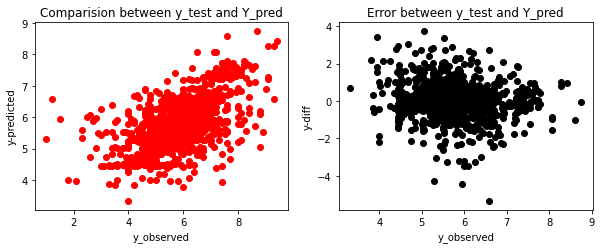

In [19]:
# Plot outputs
#x = Xtest_data.iloc[:, :0].values
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))
plt.subplot(521)
plt.xlabel("y_observed")
plt.ylabel("y-predicted")
plt.scatter(y_test, y_pred, color='red')
plt.title("Comparision between y_test and Y_pred")

plt.subplot(522)
plt.scatter(y_pred, (y_test - y_pred), color='black')
plt.title("Error between y_test and Y_pred")
plt.xlabel("y_observed")
plt.ylabel("y-diff")
plt.show()


# Model Validation

# Lasso method

In [20]:
from sklearn import linear_model

Lreg = linear_model.Lasso(alpha=0.1)
Lreg.fit(Xtrain_data[0], y_train)
y_pred2 = Lreg.predict(Xtest_data[0])



print("Ridge intercept_:", reg.intercept_)
print("Ridge reg.coef_", reg.coef_)


MSE2 = mean_squared_error(y_test, y_pred2)
print("Ridge Mean Square Error:", "{:.2f}".format(MSE))

RMSE = math.sqrt(MSE2)
print("Ridge Root Mean Square Error:", "{:.2f}".format(RMSE))


print("Ridge R-Squared:", "{:.2f}".format(metrics.r2_score(y_test, y_pred2)))
#print(RMSE)

Ridge intercept_: [6.31806632]
Ridge reg.coef_ [[-0.08090513 -0.23357707 -0.66788006 ...  0.19532527 -0.29466174
  -0.44225371]]
Ridge Mean Square Error: 1.00
Ridge Root Mean Square Error: 1.14
Ridge R-Squared: 0.13


# XGBoost Regressor

In [21]:
import xgboost as xgb
from xgboost import XGBRegressor

model3 = xgb.XGBRegressor()
model3.fit(Xtrain_data[0], y_train)
y_pred3 = model3.predict(Xtest_data[0])
#print(y_pred3)


#print("XGB intercept_:", model3.intercept_)
#print("Ridge reg.coef_", model3.coef_)


MSE3 = mean_squared_error(y_test, y_pred3)
print("XGB Mean Square Error:", "{:.2f}".format(MSE))

RMSE = math.sqrt(MSE3)
print("XGB Root Mean Square Error:", "{:.2f}".format(RMSE))


print("XGB R-Squared:", "{:.2f}".format(metrics.r2_score(y_test, y_pred3)))
#print(RMSE)

XGB Mean Square Error: 1.00
XGB Root Mean Square Error: 0.99
XGB R-Squared: 0.35


# XGBClassifier

In [22]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

data_dmatrix = xgb.DMatrix(data=Xtrain_data[0],label=y_train)

xg_reg = xgb.XGBClassifier(objective ='reg:linear', 
                           colsample_bytree = 0.3, 
                           learning_rate = 0.1,
                           max_depth = 5, 
                           alpha = 10, 
                           n_estimators = 10,
                           verbosity = 0)

xg_reg.fit(Xtrain_data[0],y_train)

preds = xg_reg.predict(Xtest_data[0])

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1.148098


In [23]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [24]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,4.935476,0.004186,4.935418,0.010243
1,4.472124,0.003919,4.471477,0.009768
2,4.055980,0.002766,4.056679,0.010815
3,3.683914,0.002206,3.686366,0.012026
4,3.349615,0.002195,3.351964,0.011741


In [25]:
print((cv_results["test-rmse-mean"]).tail(1))

49    1.032457
Name: test-rmse-mean, dtype: float64


AttributeError: module 'graphviz.backend' has no attribute 'ENCODING'

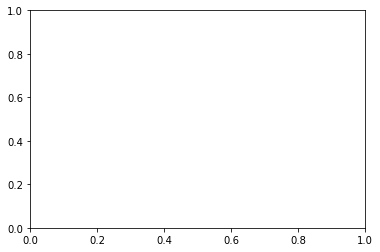

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

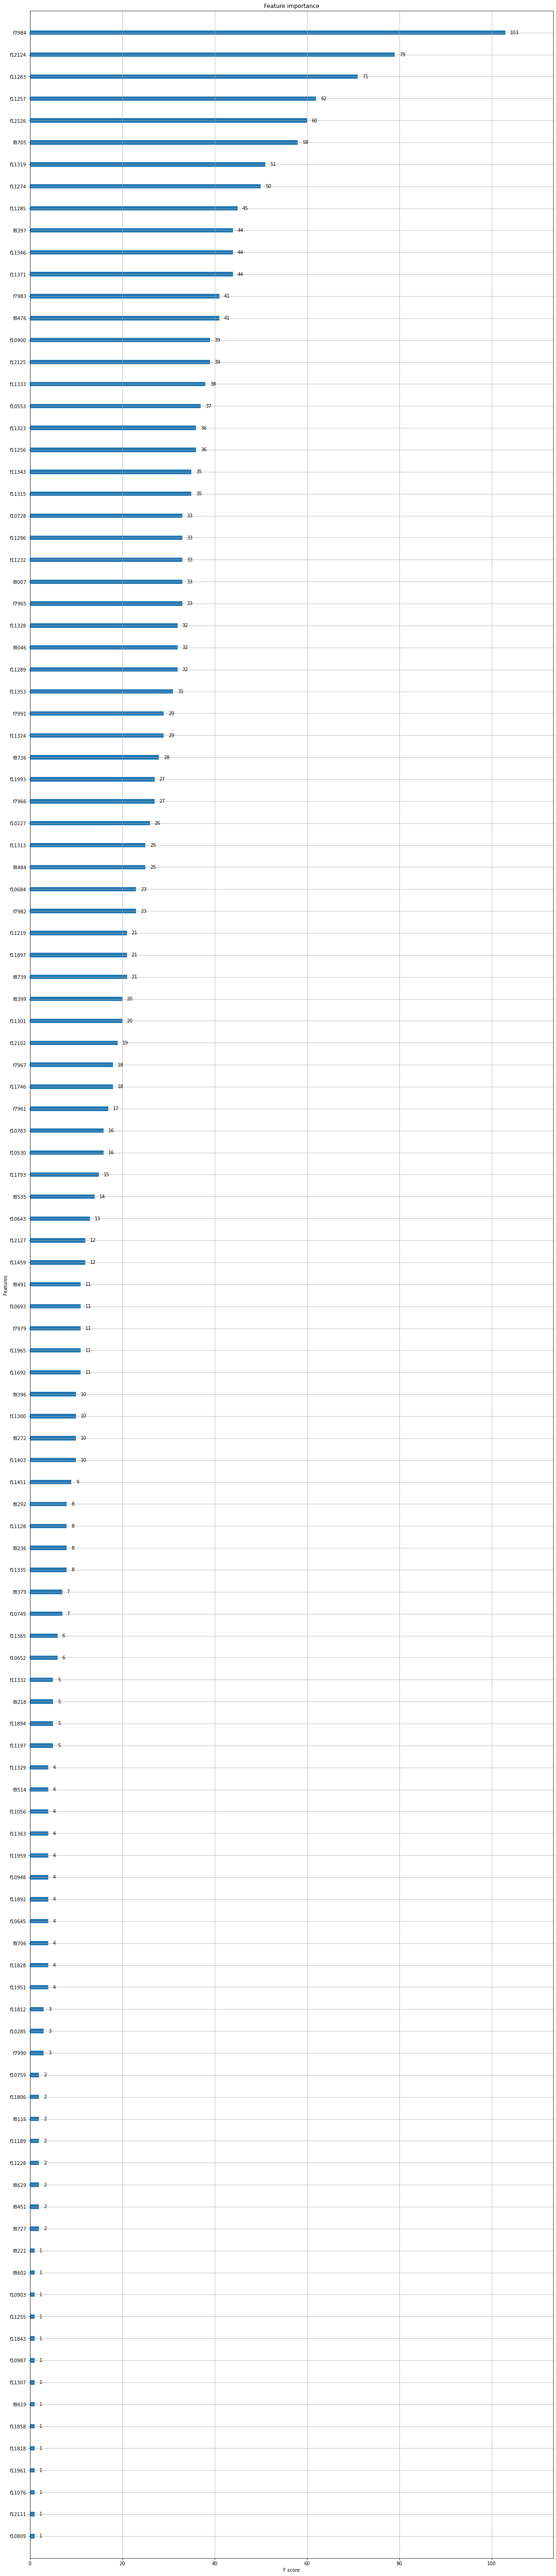

In [ ]:
plt.rcParams['figure.figsize'] = [20, 100]
xgb.plot_importance(xg_reg)
plt.show()

# Hyperparameter Tunning (tree based parameters)

In [ ]:
# Create your housing DMatrix: housing_dmatrix
data_dmatrix = xgb.DMatrix(data=Xtrain_data[0], label=y_train)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:linear", "max_depth":3}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1, 1.0]
best_rmse = []

# Systematically vary the eta 
for curr_val in eta_vals:

    params["eta"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=data_dmatrix,     
                        params=params, 
                        nfold=3, 
                        early_stopping_rounds = 5, 
                        num_boost_round=200, 
                        metrics="rmse", 
                        as_pandas=True, 
                        seed=123)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))

     eta  best_rmse
0  0.001   4.508610
1  0.010   1.264990
2  0.100   1.011676
3  1.000   1.017345


In [ ]:
data_dmatrix = xgb.DMatrix(data=Xtrain_data[0], label=y_train)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:linear", "eta":0.1}            # by keeping eta value constant 

#list of Max_depth values and empty list to store final round rmse per xgboost model
max_depths = [2,5,10,20,50]
best_rmse = []

# Systematically vary the max_depths 
for curr_val in max_depths:

    params["max_depths"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=data_dmatrix,     
                        params=params, 
                        nfold=3, 
                        early_stopping_rounds = 5, 
                        num_boost_round=200, 
                        metrics="rmse", 
                        as_pandas=True) 
                        #seed=123)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)), columns=["max_depths","best_rmse"]))

   max_depths  best_rmse
0           2   1.006934
1           5   1.006934
2          10   1.006934
3          20   1.006934
4          50   1.006934


In [ ]:
# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:linear", "eta":0.1, 'max_depths':20}

#list of gamma values and empty list to store final round rmse per xgboost model
gamma = [0, 0.1,0.01, 0.2]

best_rmse = []

# Systematically vary the gamma 
for curr_val in gamma:

    params["gamma"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=data_dmatrix,     
                        params=params, 
                        nfold=3, 
                        early_stopping_rounds = 5, 
                        num_boost_round=10, 
                        metrics="rmse", 
                        as_pandas=True, 
                        seed=123)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(gamma, best_rmse)), columns=["gamma","best_rmse"]))

   gamma  best_rmse
0   0.00   2.130493
1   0.10   2.130589
2   0.01   2.130489
3   0.20   2.130710


step 4: min_child_weight: default = 1]

Minimum sum of instance weight (hessian) needed in a child. 
If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. In linear regression task, this simply corresponds to minimum number of instances needed to be in each node. The larger min_child_weight is, the more conservative the algorithm will be.

range: 0,∞]

In [ ]:
# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:linear", "eta":0.1, 'max_depths':20, "gamma": 0.01}

#list of min_child_weight values and empty list to store final round rmse per xgboost model
min_child_weight = [6,8,10,12]

best_rmse = []

# Systematically vary the eta 
for curr_val in min_child_weight:

    params["min_child_weight"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=data_dmatrix,     
                        params=params, 
                        nfold=3, 
                        early_stopping_rounds = 5, 
                        num_boost_round=10, 
                        metrics="rmse", 
                        as_pandas=True, 
                        seed=123)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(min_child_weight, best_rmse)), columns=["min_child_weight","best_rmse"]))

   min_child_weight  best_rmse
0                 6   2.138482
1                 8   2.138795
2                10   2.138924
3                12   2.140089


In [ ]:
# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:linear", "eta":1.00, 'max_depths':20, "gamma": 0.2,'min_child_weight':6}

#list of colsample_bytree values and empty list to store final round rmse per xgboost model
colsample_bytree = [i/10.0 for i in range(6,10)]

best_rmse = []

# Systematically vary the eta 
for curr_val in colsample_bytree:

    params["colsample_bytree"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=data_dmatrix,     
                        params=params, 
                        nfold=3, 
                        early_stopping_rounds = 5, 
                        num_boost_round=10, 
                        metrics="rmse", 
                        as_pandas=True, 
                        seed=123)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree, best_rmse)), columns=["colsample_bytree","best_rmse"]))

   colsample_bytree  best_rmse
0               0.6   1.011090
1               0.7   1.015305
2               0.8   1.013003
3               0.9   1.009583


In [ ]:
# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:linear", "eta":1.00, 'max_depths':20, "gamma": 0.2,'min_child_weight':6,'colsample_bytree': 0.6}

#list of subsample values and empty list to store final round rmse per xgboost model
subsample = [i/10.0 for i in range(6,10)]
best_rmse = []

# Systematically vary the eta 
for curr_val in subsample:

    params["colsample_bytree"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=data_dmatrix,     
                        params=params, 
                        nfold=3, 
                        early_stopping_rounds = 5, 
                        num_boost_round=10, 
                        metrics="rmse", 
                        as_pandas=True, 
                        seed=123)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(subsample, best_rmse)), columns=["subsample","best_rmse"]))

   subsample  best_rmse
0        0.6   1.011090
1        0.7   1.015305
2        0.8   1.013003
3        0.9   1.009583


# Tunning regularization parameters 

In [ ]:
# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:linear", "eta":1.00, 'max_depths':20, "gamma": 0.2,'min_child_weight':6,'colsample_bytree': 0.6, 
          "subsample":0.6}

#list of subsample values and empty list to store final round rmse per xgboost model
reg_lambda = [1e-5, 1e-2, 0.1, 1, 100]
best_rmse = []

# Systematically vary the eta 
for curr_val in reg_lambda:

    params["reg_lambda"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=data_dmatrix,     
                        params=params, 
                        nfold=3, 
                        early_stopping_rounds = 5, 
                        num_boost_round=10, 
                        metrics="rmse", 
                        as_pandas=True, 
                        seed=123)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(reg_lambda, best_rmse)), columns=["reg_lambda","best_rmse"]))

   reg_lambda  best_rmse
0     0.00001   1.027977
1     0.01000   1.028078
2     0.10000   1.027407
3     1.00000   1.033121
4   100.00000   1.028172


In [ ]:
# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:linear", "eta":1.00, 'max_depths':20, "gamma": 0.2,'min_child_weight':6,'colsample_bytree': 0.6, 
          "subsample":0.6, "reg_lambda": 100}

#list of subsample values and empty list to store final round rmse per xgboost model
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
best_rmse = []

# Systematically vary the eta 
for curr_val in reg_alpha:

    params["reg_alpha"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=data_dmatrix,     
                        params=params, 
                        nfold=3, 
                        early_stopping_rounds = 5, 
                        num_boost_round=10, 
                        metrics="rmse", 
                        as_pandas=True, 
                        seed=123)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(reg_alpha, best_rmse)), columns=["reg_alpha","best_rmse"]))

   reg_alpha  best_rmse
0    0.00001   1.028172
1    0.01000   1.028190
2    0.10000   1.028198
3    1.00000   1.029501
4  100.00000   1.060256


In [ ]:

data_dmatrix = xgb.DMatrix(data=Xtrain_data[0],label=y_train)

xg_reg_T = xgb.XGBClassifier(objective ='reg:linear',
                           eta = 1.0,
                           max_depths = 20,
                           gamma = 0.2,
                           min_child_weight = 6, 
                           colsample_bytree = 0.6,
                           subsample = 0.6,
                           reg_lambda = 100,
                           alpha = 0.1,
                           n_estimators = 10,
                           verbosity = 0)

xg_reg_T.fit(Xtrain_data[0],y_train)

predT = xg_reg_T.predict(Xtest_data[0])

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predT))
print("RMSE: %f" % (rmse))

RMSE: 1.180544


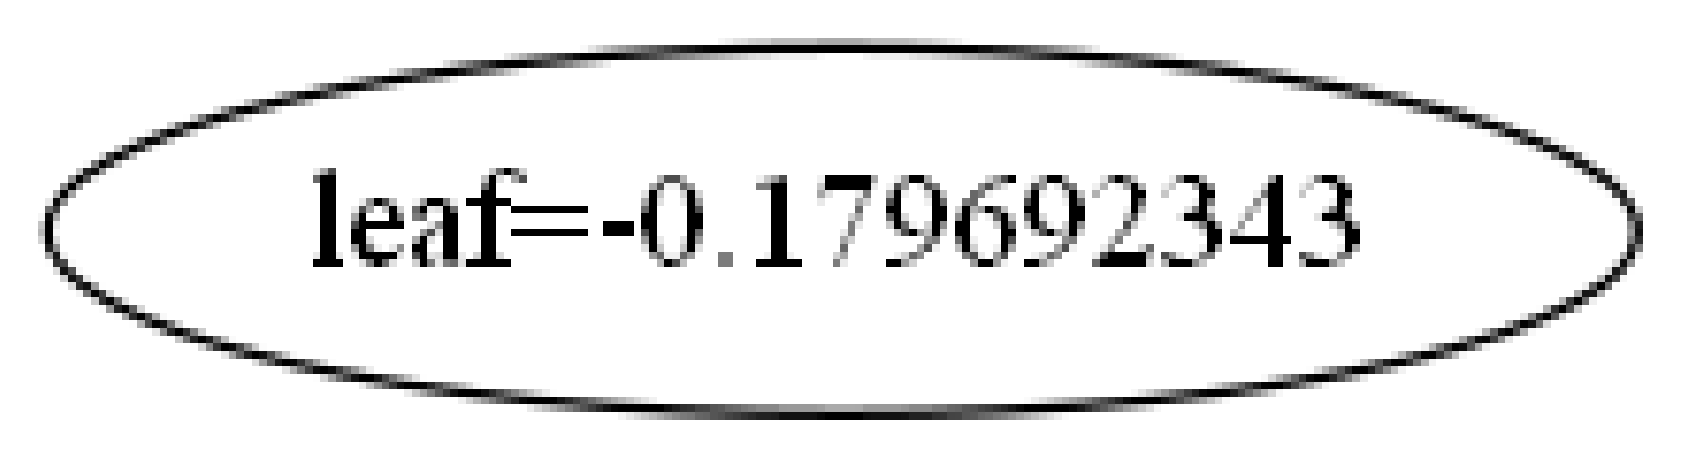

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

xgb.plot_tree(xg_reg_T,num_trees=0)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

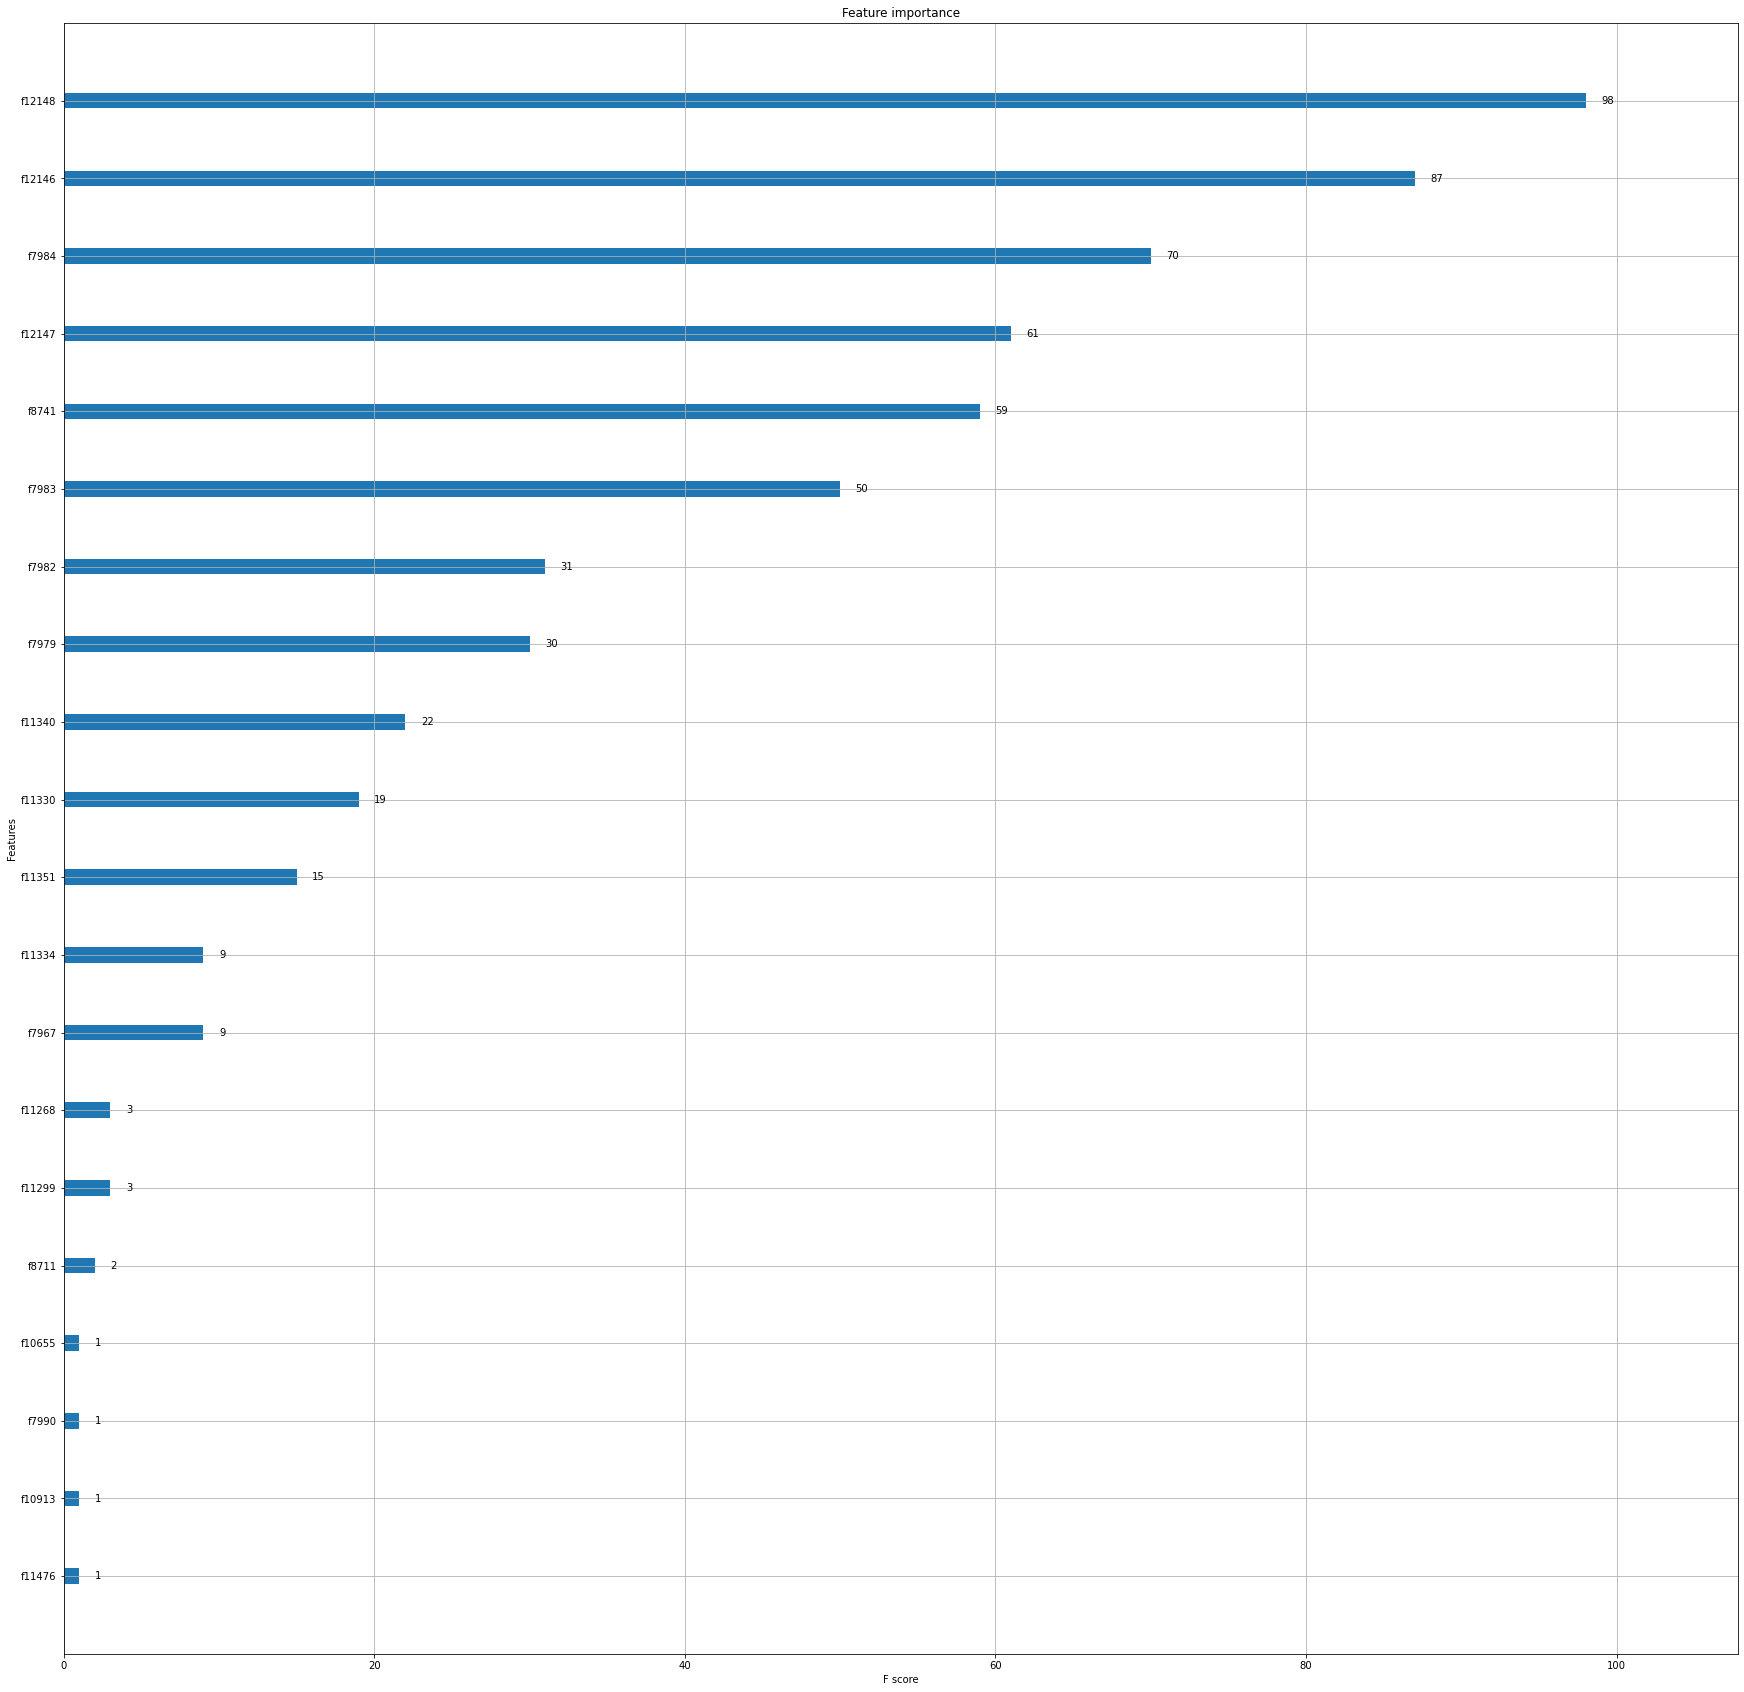

In [ ]:
plt.rcParams['figure.figsize'] = [30, 30]
xgb.plot_importance(xg_reg_T)
plt.show()

In [ ]:
feature_important = xg_reg_T.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
print(keys)
decoded_data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
print(decoded_data.head())


['f8741', 'f12147', 'f12148', 'f12146', 'f7983', 'f7979', 'f7982', 'f11340', 'f7967', 'f7984', 'f11351', 'f11334', 'f11330', 'f11299', 'f11476', 'f8711', 'f11268', 'f10913', 'f7990', 'f10655']
        score
f12148     98
f12146     87
f7984      70
f12147     61
f8741      59


In [ ]:
decoded_data.idxmax()

score    f12148
dtype: object

# XGBoost hyper-parameter tuning by grid search 

In [ ]:

#def hyperParameterTuning(X_train, y_train):
param_tuning = {
        'learning_rate':[0.01],                     # from [0.001, 0.01, 0.1, 1.0]
        'max_depth':[7],                            #  [3,5,7,10,20]
        'min_child_weight': [1],                    # [1,3,5,6,8,10,12] 
        'subsample':[0.6],                          #[0.5,0.6, 0.7, 0.8, 0.9,1.0],
        'colsample_bytree':[0.5],                  #[0.5,0.6, 0.7, 0.8, 0.9,1.0],
        'n_estimators' : [200]                      #[100, 200, 500]
         
    }

xgb_model = xgb.XGBClassifier()
gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           cv = 3,
                           verbose = 1)

gsearch.fit(Xtrain_data[0],y_train)

print(gsearch.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.6}


In [ ]:


xg_reg_GS = xgb.XGBClassifier(objective ='reg:linear',
                           eta = 0.01,
                           max_depths = 7,
                           gamma = 0.2,
                           min_child_weight = 1, 
                           colsample_bytree = 0.5,
                           subsample = 0.6,
                           reg_lambda = 100,
                           alpha = 0.1,
                           n_estimators = 10,
                           verbosity = 0)

xg_reg_GS.fit(Xtrain_data[0],y_train)

predGS = xg_reg_GS.predict(Xtest_data[0])

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predGS))
print("RMSE: %f" % (rmse))

RMSE: 1.245737


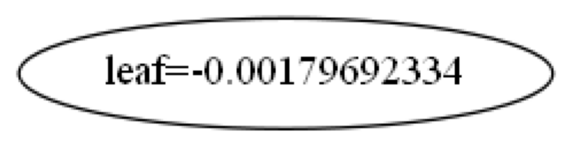

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

xgb.plot_tree(xg_reg_GS,num_trees=0)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

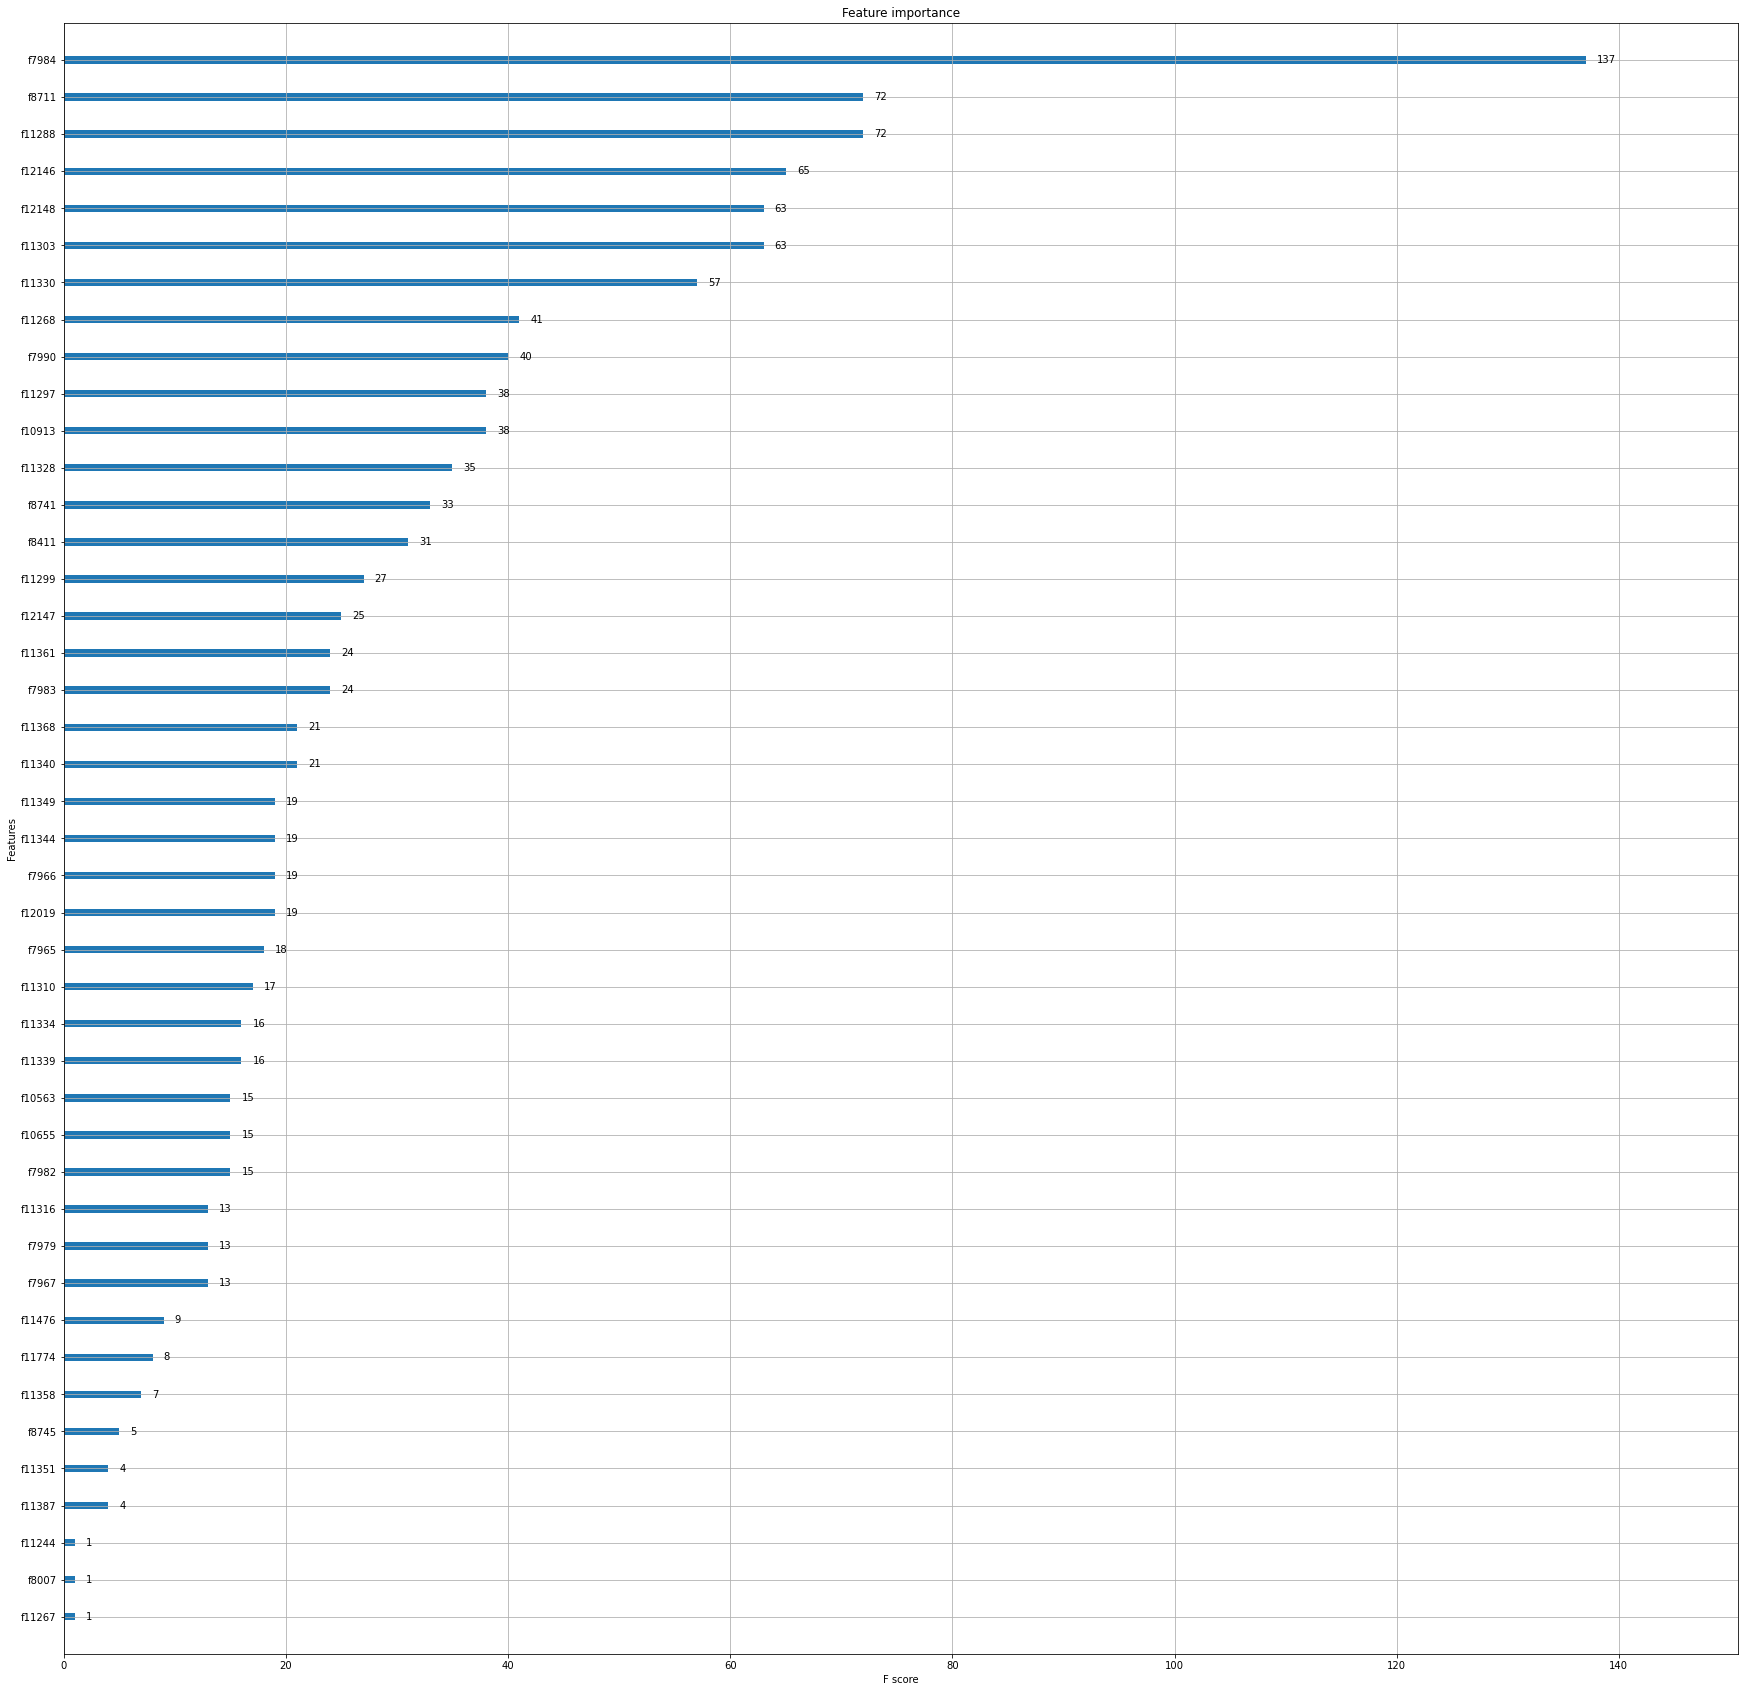

In [ ]:
plt.rcParams['figure.figsize'] = [30, 30]
xgb.plot_importance(xg_reg_GS)
plt.show()

In [27]:
filename = 'model3.sav'
pickle.dump(model3, open(filename, 'wb'))